### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

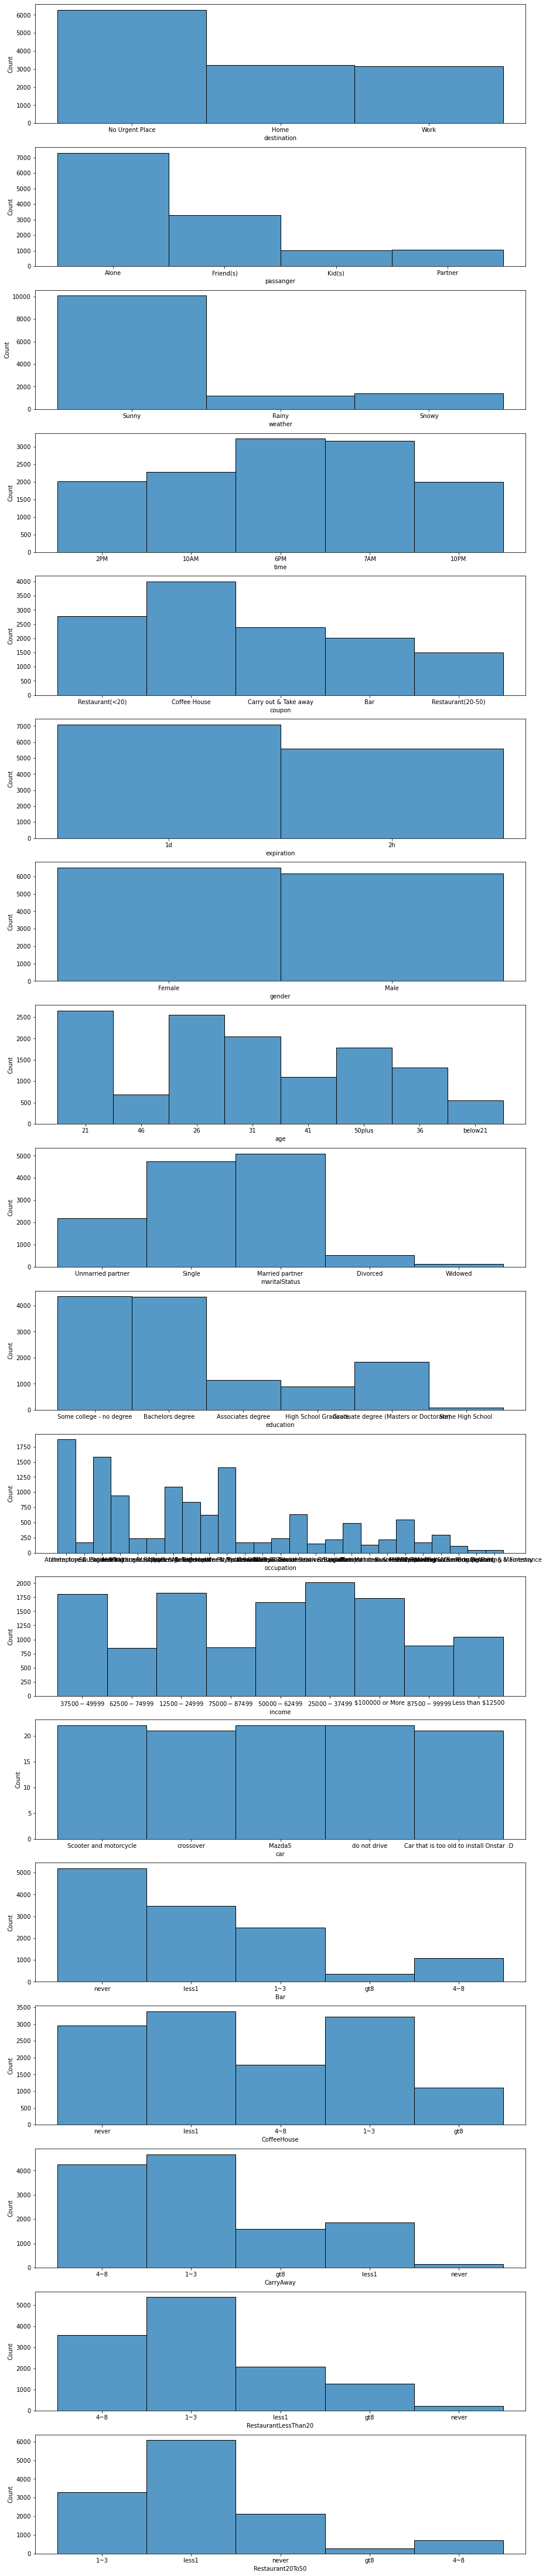

In [5]:
#Check for Null Values
data.isnull()

# Create a subset with only categorical columns
categoric = data.select_dtypes('object').columns
# Plot histograms for each categorical column
plt.figure(figsize=(15,80))
for i, col in enumerate(categoric):
    ax = plt.subplot(len(categoric), 1, i+1)
    sns.histplot(data=data, x=col, ax=ax)

3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
## looks like 'car' column is missing values, remove car 
## rest of columns with missing data - is ~1% of data each, explore removing that as well. 
data.shape

#remove car column
data1 = data.drop(columns=['car'])




In [15]:
#Check nulls
missing_vals = data1.isnull().sum()
missing_vals


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway                 0
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [16]:
## filter out all rows with nulls() and verify the output
data2 = data1.dropna()
#data2.shape
data2.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

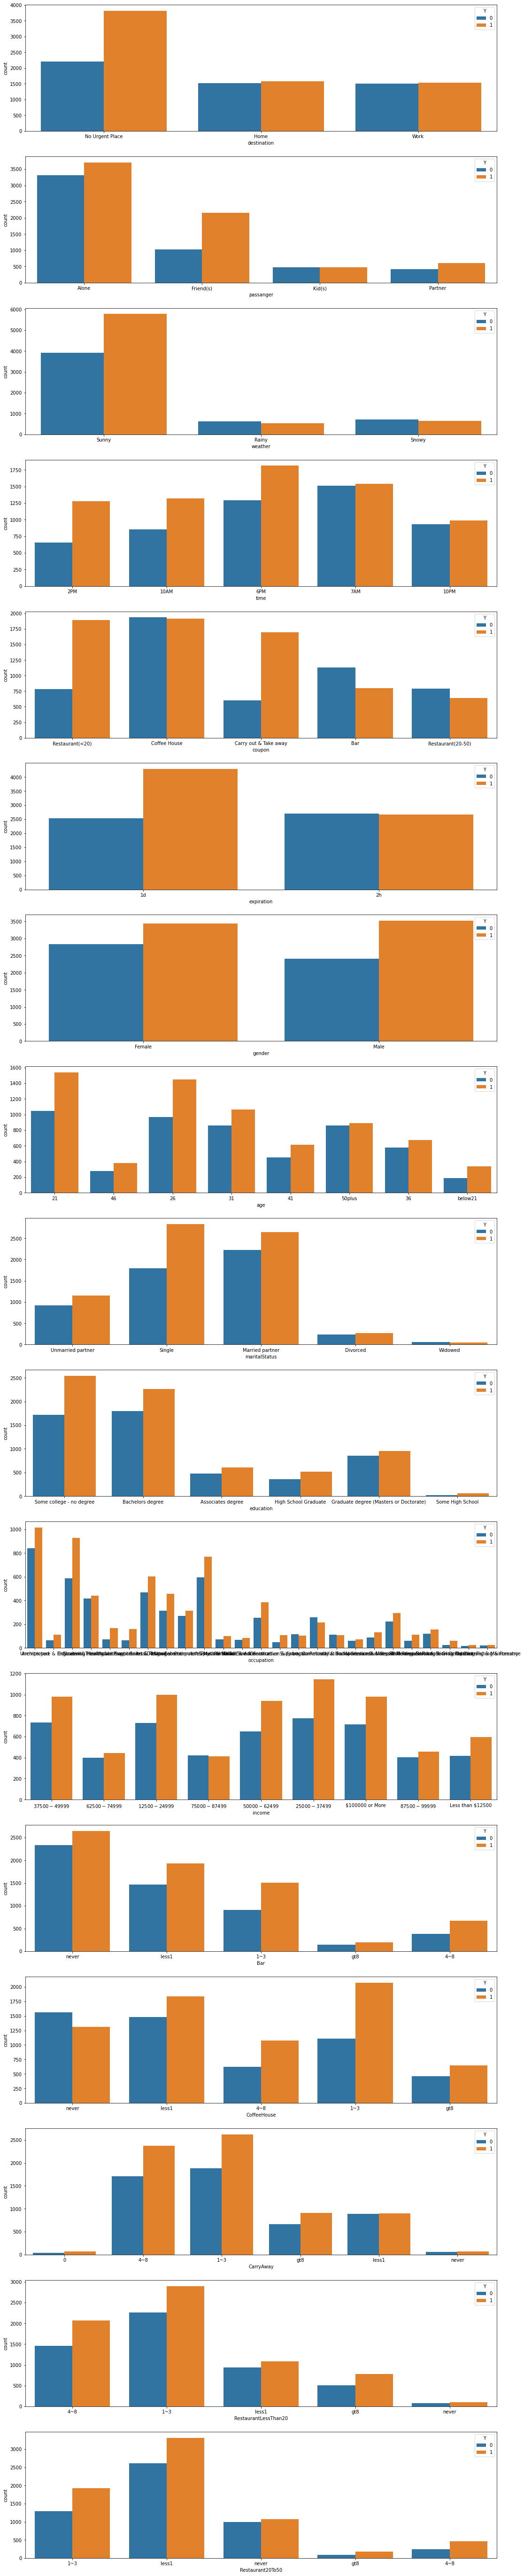

In [19]:
# Plotcharts to understand the distribution for each category between accepting and not
categoric = data2.select_dtypes('object').columns
# create individual countplots for each categorical column, this time including a breakdown between Y/N.
plt.figure(figsize=(18, 100))
for i, col in enumerate(categoric):
   ax = plt.subplot(len(categoric), 1, i+1)
   sns.countplot(data=data2, x=col, ax=ax, hue = 'Y')

4. What proportion of the total observations chose to accept the coupon? 



In [289]:
#Identify how many people accepted coupons
accepted=data[data["Y"] == 1]["Y"].count()
total=data["Y"].count()
acceptance_rate=accepted/total*100
print("Acceptance Rate" , acceptance_rate)

Acceptance Rate 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='Y', ylabel='coupon'>

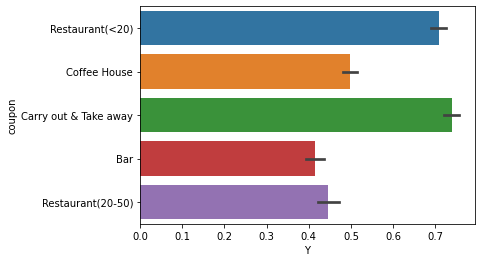

In [20]:
sns.barplot(y="coupon", x="Y", data=data2)

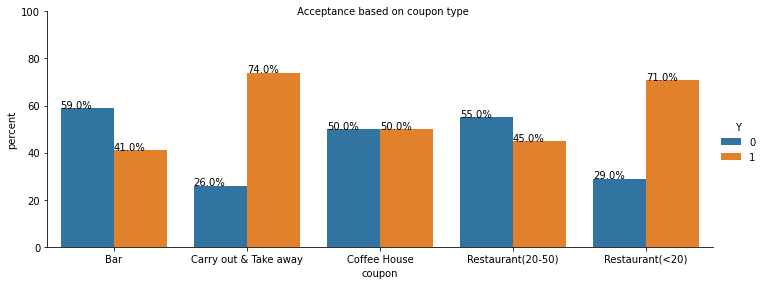

In [21]:
# Explore acceptance rate based 
x,y = 'coupon', 'Y' 

qchart = data2.groupby(x)[y].value_counts(normalize=True).mul(100).round(0).rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=qchart,  height=4, aspect=2.5)
g.fig.suptitle(' Acceptance based on coupon type', size = 10)
g.ax.set_ylim(0,100)


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#Conclusion: Acceptance rate varies greatly by coupon type, lowest is Bar, and highest is Carry out & Take away

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

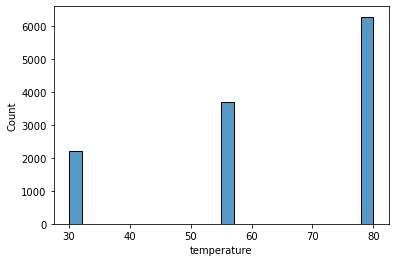

In [22]:
#Histogram for temperature
sns.histplot(data2["temperature"])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
#Create a dataframe where coupon type is Bar
df_bar_coupons=data.query('coupon == "Bar"')



2. What proportion of bar coupons were accepted?


In [24]:
df_bar_coupons.loc[df_bar_coupons['Y'] == 1].shape[0]/ df_bar_coupons.shape[0]



0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
df_bar_coupons.loc[(df_bar_coupons['Y'] == 1) & (df_bar_coupons['Bar'] == "4~8")].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Bar'] == "4~8")].shape[0]

0.78

In [26]:
# acceptance rate for the bar goers never, less1, and 1~3
bar_coupons_3_and_fewer = df_bar_coupons.loc[(df_bar_coupons['Bar'] == "never") | (df_bar_coupons['Bar'] == "1~3") |(df_bar_coupons['Bar'] == "less1")]
bar_coupons_3_and_fewer.loc[(df_bar_coupons['Y'] == 1)].shape[0]/ bar_coupons_3_and_fewer.shape[0]

0.37061769616026713

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
# create new column Condition, and assign Match for the folks who satisfy condition 
df_bar_coupons.loc[((df_bar_coupons['Bar'] == "1~3") | (df_bar_coupons['Bar'] == "4~8")) & ((df_bar_coupons['age'] != "21") & (df_bar_coupons['age'] != "below21")), 'Condition'] = 'Match'
# calculate acceptance rate
df_bar_coupons.loc[((df_bar_coupons['Condition4'] == "Match") & (df_bar_coupons['Y'] == 1))].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Condition'] == "Match")].shape[0]
# result in 69% acceptance rate for folks who satisfy this condition, vs 41% acceptance as calculated above


0.6948717948717948

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
# create new column Condition5, and assign Match for the folks who satisfy condition 5
df_bar_coupons.loc[((df_bar_coupons['Bar'] != "never") & (df_bar_coupons['Bar'] != "less1") & (df_bar_coupons['passanger'] != "Kid(s)") & (df_bar_coupons['occupation'] != "Farming Fishing & Forestry")), 'Condition5'] = 'Match'
# calculate acceptance rate
df_bar_coupons.loc[((df_bar_coupons['Condition5'] == "Match") & (df_bar_coupons['Y'] == 1))].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Condition5'] == "Match")].shape[0]
# result in 71% acceptance rate for folks who satisfy this condition, vs 41% across everyone as calculated above
#bar_coupons.loc[((bar_coupons['Condition5'] == "Match"))]['occupation']#.str.contains('Farming')

0.70298769771529

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [31]:

# Create column Condition6a that assign Match to: go to bars more than once a month, had passengers that were not a kid, and were not widowed 
df_bar_coupons.loc[(
   (((df_bar_coupons['Bar'] != "never") | (df_bar_coupons['Bar'] != "less1")) & (df_bar_coupons['passanger'] != "Kid(s)") 
   & (df_bar_coupons['maritalStatus'] != "Widowed"))), 
   'Condition6a'] = 'Match'

# calculate acceptance rate
Condition6a = df_bar_coupons.loc[((df_bar_coupons['Condition6a'] == "Match") & (df_bar_coupons['Y'] == 1))].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Condition6a'] == "Match")].shape[0]

print ("Condition6a: " + str(Condition6a) )

# 6a: result in 44% acceptance rate for folks who satisfy this condition, vs 41% across everyone as calculated above

Condition6a: 0.4340782122905028


In [33]:
# Create column Condition6b that assign Match to: go to bars more than once a month and are under the age of 30 
df_bar_coupons.loc[
   (((df_bar_coupons['Bar'] != "never") | (df_bar_coupons['Bar'] != "less1")) & ((df_bar_coupons['age'] == "21") | (df_bar_coupons['age'] == "26") | (df_bar_coupons['age'] == "below21") ) ), 
   'Condition6b'] = 'Match'

# calculate acceptance rate
Condition6b = df_bar_coupons.loc[((df_bar_coupons['Condition6b'] == "Match") & (df_bar_coupons['Y'] == 1))].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Condition6b'] == "Match")].shape[0]
print ("Condition6b: " + str(Condition6b) )

# 6b: result in 49% acceptance rate for folks who satisfy this condition, vs 41% across everyone as calculated above


Condition6b: 0.489432703003337


In [35]:
# Create column Condition6c that assign Match to: go to cheap restaurants more than 4 times a month and income is less than 50K.
df_bar_coupons.loc[
  (( (df_bar_coupons['RestaurantLessThan20'] != "never") | (df_bar_coupons['RestaurantLessThan20'] != "1~3") | (df_bar_coupons['RestaurantLessThan20'] != "less1")) & 
     ((df_bar_coupons['income'] == "$12500 - $24999") | (df_bar_coupons['income'] == "$25000 - $37499") | (df_bar_coupons['income'] == "$37500 - $49999") | (df_bar_coupons['income'] == "Less than $12500") )),  

   'Condition6c'] = 'Match'

# calculate acceptance rate
Condition6c = df_bar_coupons.loc[((df_bar_coupons['Condition6c'] == "Match") & (df_bar_coupons['Y'] == 1))].shape[0]/ df_bar_coupons.loc[(df_bar_coupons['Condition6c'] == "Match")].shape[0]
print ("Condition6c: " + str(Condition6c) )

# 6c: result in 42% acceptance rate for folks who satisfy this condition, vs 41% across everyone as calculated above


Condition6c: 0.4161849710982659


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the sampled population/ dataset, we can hypothesize that drivers with following characteristics are more likely to accept coupons:

Frequent bar goers (4~8) - 78% vs 37% for rest of observations
Bar goers over the age of 25 (69%)
Bar goers without kids as passengers, and not in the farming/ fishing/ forestry industry (71%)
Bar goers without kids and not widowed have only a slightly higher acceptance rate (44%) then average (41%)
Younger bar goers (<30 years) are more likely to accept (49%) then average, however not as much those over the age of 25 (69%), suggesting >=30 years old are much more likely to accept coupons
Individuals with income less than 50K and eat in cheap restaurants >4 times a month are accepting coupons broadly in average across all samples population

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In the next section I will explore acceptance rates for drivers who get coupons for low priced restaurants.

In [36]:
Rest20_coupons = data2.loc[data2['coupon'] == 'Restaurant(<20)'].copy()
print(type(Rest20_coupons))

<class 'pandas.core.frame.DataFrame'>


In [37]:

Rest20_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2678 non-null   object
 1   passanger             2678 non-null   object
 2   weather               2678 non-null   object
 3   temperature           2678 non-null   int64 
 4   time                  2678 non-null   object
 5   coupon                2678 non-null   object
 6   expiration            2678 non-null   object
 7   gender                2678 non-null   object
 8   age                   2678 non-null   object
 9   maritalStatus         2678 non-null   object
 10  has_children          2678 non-null   int64 
 11  education             2678 non-null   object
 12  occupation            2678 non-null   object
 13  income                2678 non-null   object
 14  Bar                   2678 non-null   object
 15  CoffeeHouse           2678 non-null  

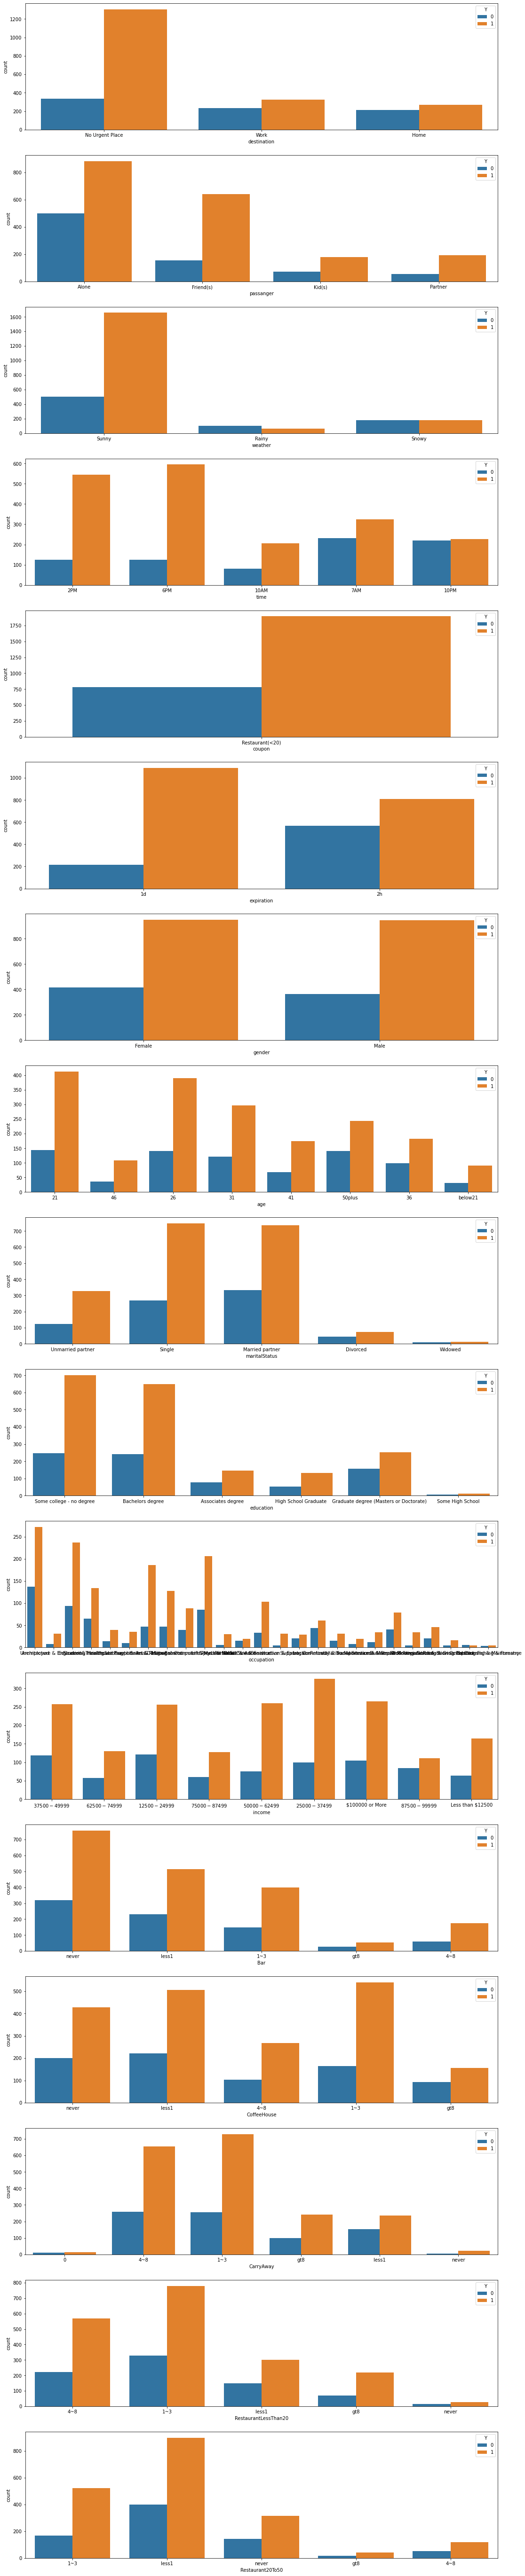

In [38]:
# 1. Plot charts to understand the distribution for each category between accepting and not
# First filter for only categorical columns
categoric = Rest20_coupons.select_dtypes('object').columns
# Then create individual countplots for each categorical column, this time including a breakdown between Y/N.
plt.figure(figsize=(18, 100))
for i, col in enumerate(categoric):
   ax = plt.subplot(len(categoric), 1, i+1)
   sns.countplot(data=Rest20_coupons, x=col, ax=ax, hue = 'Y')

In [39]:

#Calculate acceptance rate across all the subsample
Rest20_coupons['Y'].value_counts(normalize=True).mul(100).round(0)
#Answer is 71%

1    71.0
0    29.0
Name: Y, dtype: float64

In [40]:
#Calculate % acceptance rate across all categories to identify outliers 
categoric = Rest20_coupons.select_dtypes('object').columns
for i, col in enumerate(categoric):
   print(Rest20_coupons.groupby(col)['Y'].mean())

destination
Home               0.557411
No Urgent Place    0.794279
Work               0.582734
Name: Y, dtype: float64
passanger
Alone        0.639190
Friend(s)    0.804020
Kid(s)       0.714286
Partner      0.777328
Name: Y, dtype: float64
weather
Rainy    0.386503
Snowy    0.493036
Sunny    0.768089
Name: Y, dtype: float64
time
10AM    0.718750
10PM    0.505593
2PM     0.814371
6PM     0.827538
7AM     0.582734
Name: Y, dtype: float64
coupon
Restaurant(<20)    0.707991
Name: Y, dtype: float64
expiration
1d    0.834996
2h    0.587636
Name: Y, dtype: float64
gender
Female    0.695238
Male      0.721249
Name: Y, dtype: float64
age
21         0.741007
26         0.735350
31         0.708134
36         0.647687
41         0.716049
46         0.750000
50plus     0.635417
below21    0.739837
Name: Y, dtype: float64
maritalStatus
Divorced             0.627119
Married partner      0.687850
Single               0.734513
Unmarried partner    0.726667
Widowed              0.521739
Name: Y, dtyp

In [41]:
# Show the number of categories in each alongside percentages 
categoric = Rest20_coupons.select_dtypes('object').columns
for i, col in enumerate(categoric):
   print(str (Rest20_coupons.groupby(col)['Y'].value_counts()) + " " + str (Rest20_coupons.groupby(col)['Y'].mean()) )

destination      Y
Home             1     267
                 0     212
No Urgent Place  1    1305
                 0     338
Work             1     324
                 0     232
Name: Y, dtype: int64 destination
Home               0.557411
No Urgent Place    0.794279
Work               0.582734
Name: Y, dtype: float64
passanger  Y
Alone      1    884
           0    499
Friend(s)  1    640
           0    156
Kid(s)     1    180
           0     72
Partner    1    192
           0     55
Name: Y, dtype: int64 passanger
Alone        0.639190
Friend(s)    0.804020
Kid(s)       0.714286
Partner      0.777328
Name: Y, dtype: float64
weather  Y
Rainy    0     100
         1      63
Snowy    0     182
         1     177
Sunny    1    1656
         0     500
Name: Y, dtype: int64 weather
Rainy    0.386503
Snowy    0.493036
Sunny    0.768089
Name: Y, dtype: float64
time  Y
10AM  1    207
      0     81
10PM  1    226
      0    221
2PM   1    544
      0    124
6PM   1    595
      0    124

Based on the observations above, drivers who are most likely to accept coupons have the attributes below. We will further examine more some of these dimensions to get more detailed insights.

Destination: No urgent place
passanger: Friends(s)
weather: Sunny
Time: 2PM, 6 PM
Expiration: 1d
maritalStats: Single + Unmarried partner
occupation: Protective Service, Construction & Extraction
CarryAway: never

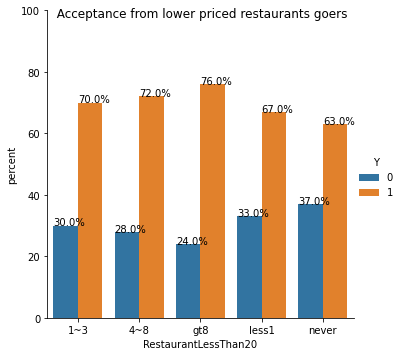

In [42]:
#Explore acceptance rate depending on frequency of restaurant visits, 
#Number of times that he/she eats at a restaurant with average expense less than \$20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
x,y = 'RestaurantLessThan20', 'Y' 


qchart = Rest20_coupons.groupby(x)[y].value_counts(normalize=True).mul(100).round(0).rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=qchart)
g.fig.suptitle('  Acceptance from lower priced restaurants goers')
g.ax.set_ylim(0,100)
 
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Takeaway: Althouth gt8 have the largest percentage of acceptance (76%), its interesting that the acceptance for never is 
# still quite high, potentially indicating an opoprtunity to attract new customers

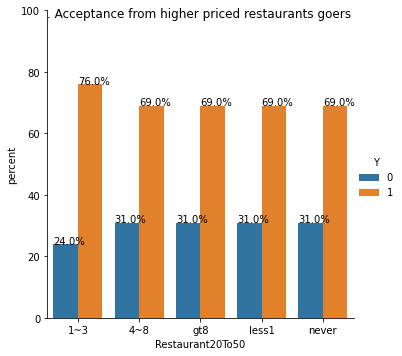

In [43]:
#Lets examine the acceptance for drivers to tend to go to more expensive restaurants
x,y = 'Restaurant20To50', 'Y' 

qchart = Rest20_coupons.groupby(x)[y].value_counts(normalize=True).mul(100).round(0).rename('percent').reset_index()
 
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=qchart)
g.fig.suptitle('. Acceptance from higher priced restaurants goers')
g.ax.set_ylim(0,100)
 
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Takeaway: Drivers who ocasionally (1~3 per month) visit more expensive restaurants, are also open to accept coupons from lower priced res

In [44]:

#Lets explore the acceptance rate of the drivers who are most likely to accept in the individual categories
#Destination: No urgent place
#passanger: Friends(s)
#weather: Sunny
#Time: 2PM, 6 PM
#Expiration: 1d
#maritalStats: Single + Unmarried partner
#occupation: Protective Service, Construction & Extraction

# Create column MostLikely that assign Match to drivers who satisfy the condition above

r20 = Rest20_coupons.copy()
r20.loc[((r20.destination == "No Urgent Place")& (r20['passanger'] == "Friend(s)")& (r20['weather'] == 'Sunny')), 'MostLikely1'] = "Match"

print(r20[r20['MostLikely1'] == "Match"].groupby('MostLikely1')['Y'].mean())

#MostLikely = r20.loc[((r20['MostLikely'] == "Match") & (r20['Y'] == 1))].shape[0]/ r20.loc[(r20['MostLikely'] == "Match")].shape[0]
#print ("MostLikely: " + str(MostLikely) )


#[DEPRECATED:]
#print(r20.loc[((r20['Y'] == 1) & (r20["MostLikely"] == "Match"))].value_counts(normalize=True).mul(100).round(0))
# calculate acceptance rate

# result in 80% acceptance rate for folks who satisfy this condition

MostLikely1
Match    0.803419
Name: Y, dtype: float64


In [45]:
print(r20[r20['MostLikely1'] == "Match"].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 5 to 12662
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           702 non-null    object
 1   passanger             702 non-null    object
 2   weather               702 non-null    object
 3   temperature           702 non-null    int64 
 4   time                  702 non-null    object
 5   coupon                702 non-null    object
 6   expiration            702 non-null    object
 7   gender                702 non-null    object
 8   age                   702 non-null    object
 9   maritalStatus         702 non-null    object
 10  has_children          702 non-null    int64 
 11  education             702 non-null    object
 12  occupation            702 non-null    object
 13  income                702 non-null    object
 14  Bar                   702 non-null    object
 15  CoffeeHouse           702 non-null    

In [46]:
#Lets explore the acceptance rate of the drivers who are most likely to accept in the individual categories
#Destination: No urgent place
#passanger: Friends(s)
#weather: Sunny
#Time: 2PM, 6 PM
#Expiration: 1d
#maritalStats: Single & Unmarried partner
#occupation: Protective Service, Construction & Extraction

# Create column MostLikely that assign Match to drivers who satisfy the condition above

r20 = Rest20_coupons.copy()
r20.loc[(((r20.time == "2PM") | (r20.time == "6PM"))& (r20['expiration'] == "1d") & ((r20.maritalStatus == 'Single')|(r20.maritalStatus == 'Unmarried partner') )
 & ((r20.occupation == 'Protective Service')|(r20.occupation == 'Construction & Extraction') ) ), 'MostLikely2'] = "Match"
r20[r20['MostLikely2'] == "Match"].info()
#print(r20.groupby('MostLikely2')['Y'].mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2982 to 11584
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           6 non-null      object
 1   passanger             6 non-null      object
 2   weather               6 non-null      object
 3   temperature           6 non-null      int64 
 4   time                  6 non-null      object
 5   coupon                6 non-null      object
 6   expiration            6 non-null      object
 7   gender                6 non-null      object
 8   age                   6 non-null      object
 9   maritalStatus         6 non-null      object
 10  has_children          6 non-null      int64 
 11  education             6 non-null      object
 12  occupation            6 non-null      object
 13  income                6 non-null      object
 14  Bar                   6 non-null      object
 15  CoffeeHouse           6 non-null     

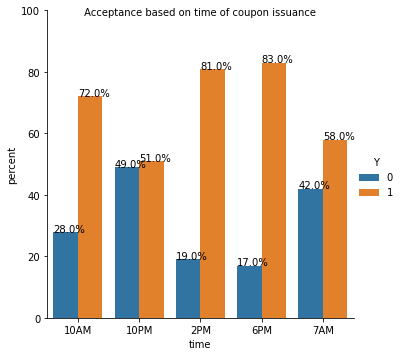

In [47]:
#Lets explore the attributes of drivers who have the lowest coupon acceptance rate.
# the acceptance for drivers to tend to go to more expensive restaurants
x,y = 'time', 'Y' 

qchart = Rest20_coupons.groupby(x)[y].value_counts(normalize=True).mul(100).round(0).rename('percent').reset_index()
 
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=qchart)
g.fig.suptitle(' Acceptance based on time of coupon issuance', size = 10)
g.ax.set_ylim(0,100)
 
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Takeaway: The lowest acceptance rate is for coupons issued at 7 am and 10 pm, which intuitively makes sense 

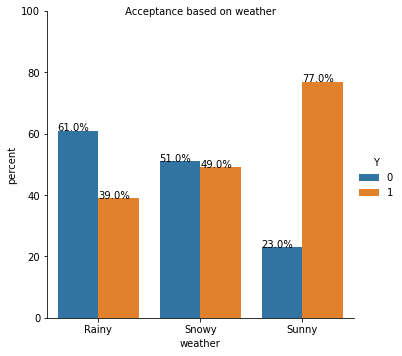

In [48]:
#Lets explore the attributes of drivers who have the lowest coupon acceptance rate.
# the acceptance for drivers to tend to go to more expensive restaurants
x,y = 'weather', 'Y' 

qchart = Rest20_coupons.groupby(x)[y].value_counts(normalize=True).mul(100).round(0).rename('percent').reset_index()
 
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=qchart)
g.fig.suptitle(' Acceptance based on weather', size = 10)
g.ax.set_ylim(0,100)
 
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Takeaway: Weather has a impact on whether a coupon is accepted. Lowest rate is in Rainy weather at 39%, and highest during Sunny days at 77%.